# Problem statement
Data Description:  The actual concrete compressive strength (MPa) for a given mixture under a  specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations). Domain:  Material manufacturing Context: Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. 
 
Attribute Information: ● Cement    : measured in  kg in a m3 mixture ● Blast     : measured in  kg in a m3 mixture ● Fly ash     : measured in  kg in a m3 mixture ● Water     : measured in  kg in a m3 mixture ● Superplasticizer   : measured in  kg in a m3 mixture ● Coarse Aggregate   : measured in  kg in a m3 mixture ● Fine Aggregate   : measured in  kg in a m3 mixture ● Age     : day (1~365) ● Concrete compressive strength measured in MPa 
 
Learning Outcomes:  ● Exploratory Data Analysis ● Building ML models for regression ● Hyper parameter tuning 
 
Objective:  Modeling of strength of high performance concrete using Machine Learning

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("concrete.csv")  

In [4]:
df.head() # Observing a part of the dataset

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
#Cheching for any null values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
# No null values are present in the dataset
#Now checking for any non numerical value
df[~df.applymap(np.isreal).all(1)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [7]:
# All the values present in the dataset are numeric
# Using describe function doing some statistical analysis like finding the outliers, watching interquartile range etc
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


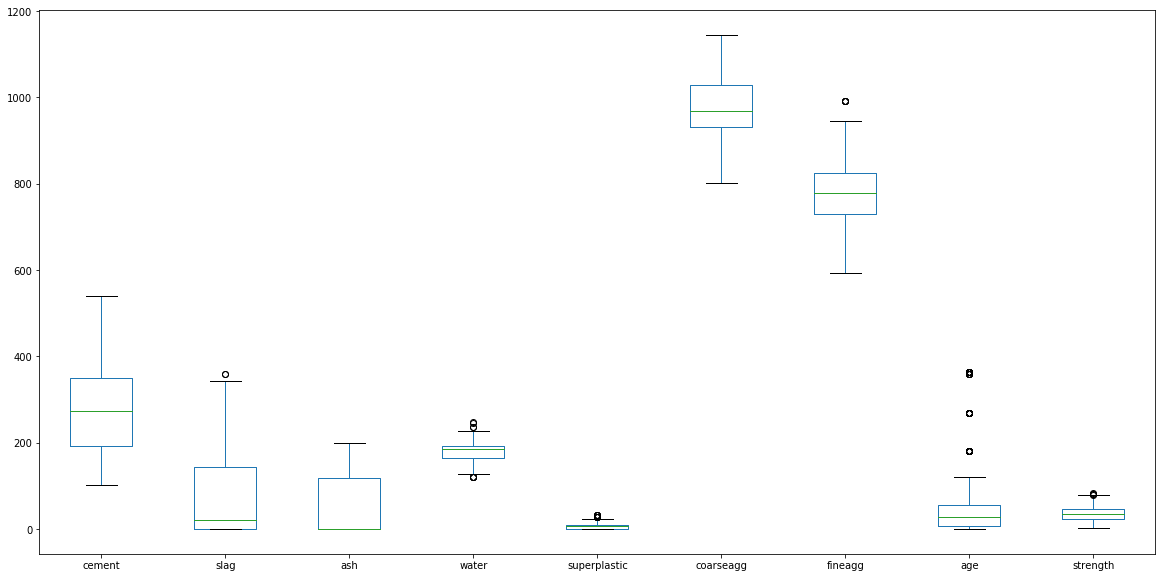

In [8]:
# Using boxplot let us find the outliers visually
#Boxplot to understand spread and outliers
df.plot(kind='box', figsize=(20,10))

In [9]:
df.shape

(1030, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
# Again we see all the data are numeric
##  Step 4 Let us do a pair plot analysis to visually check number of likely clusters

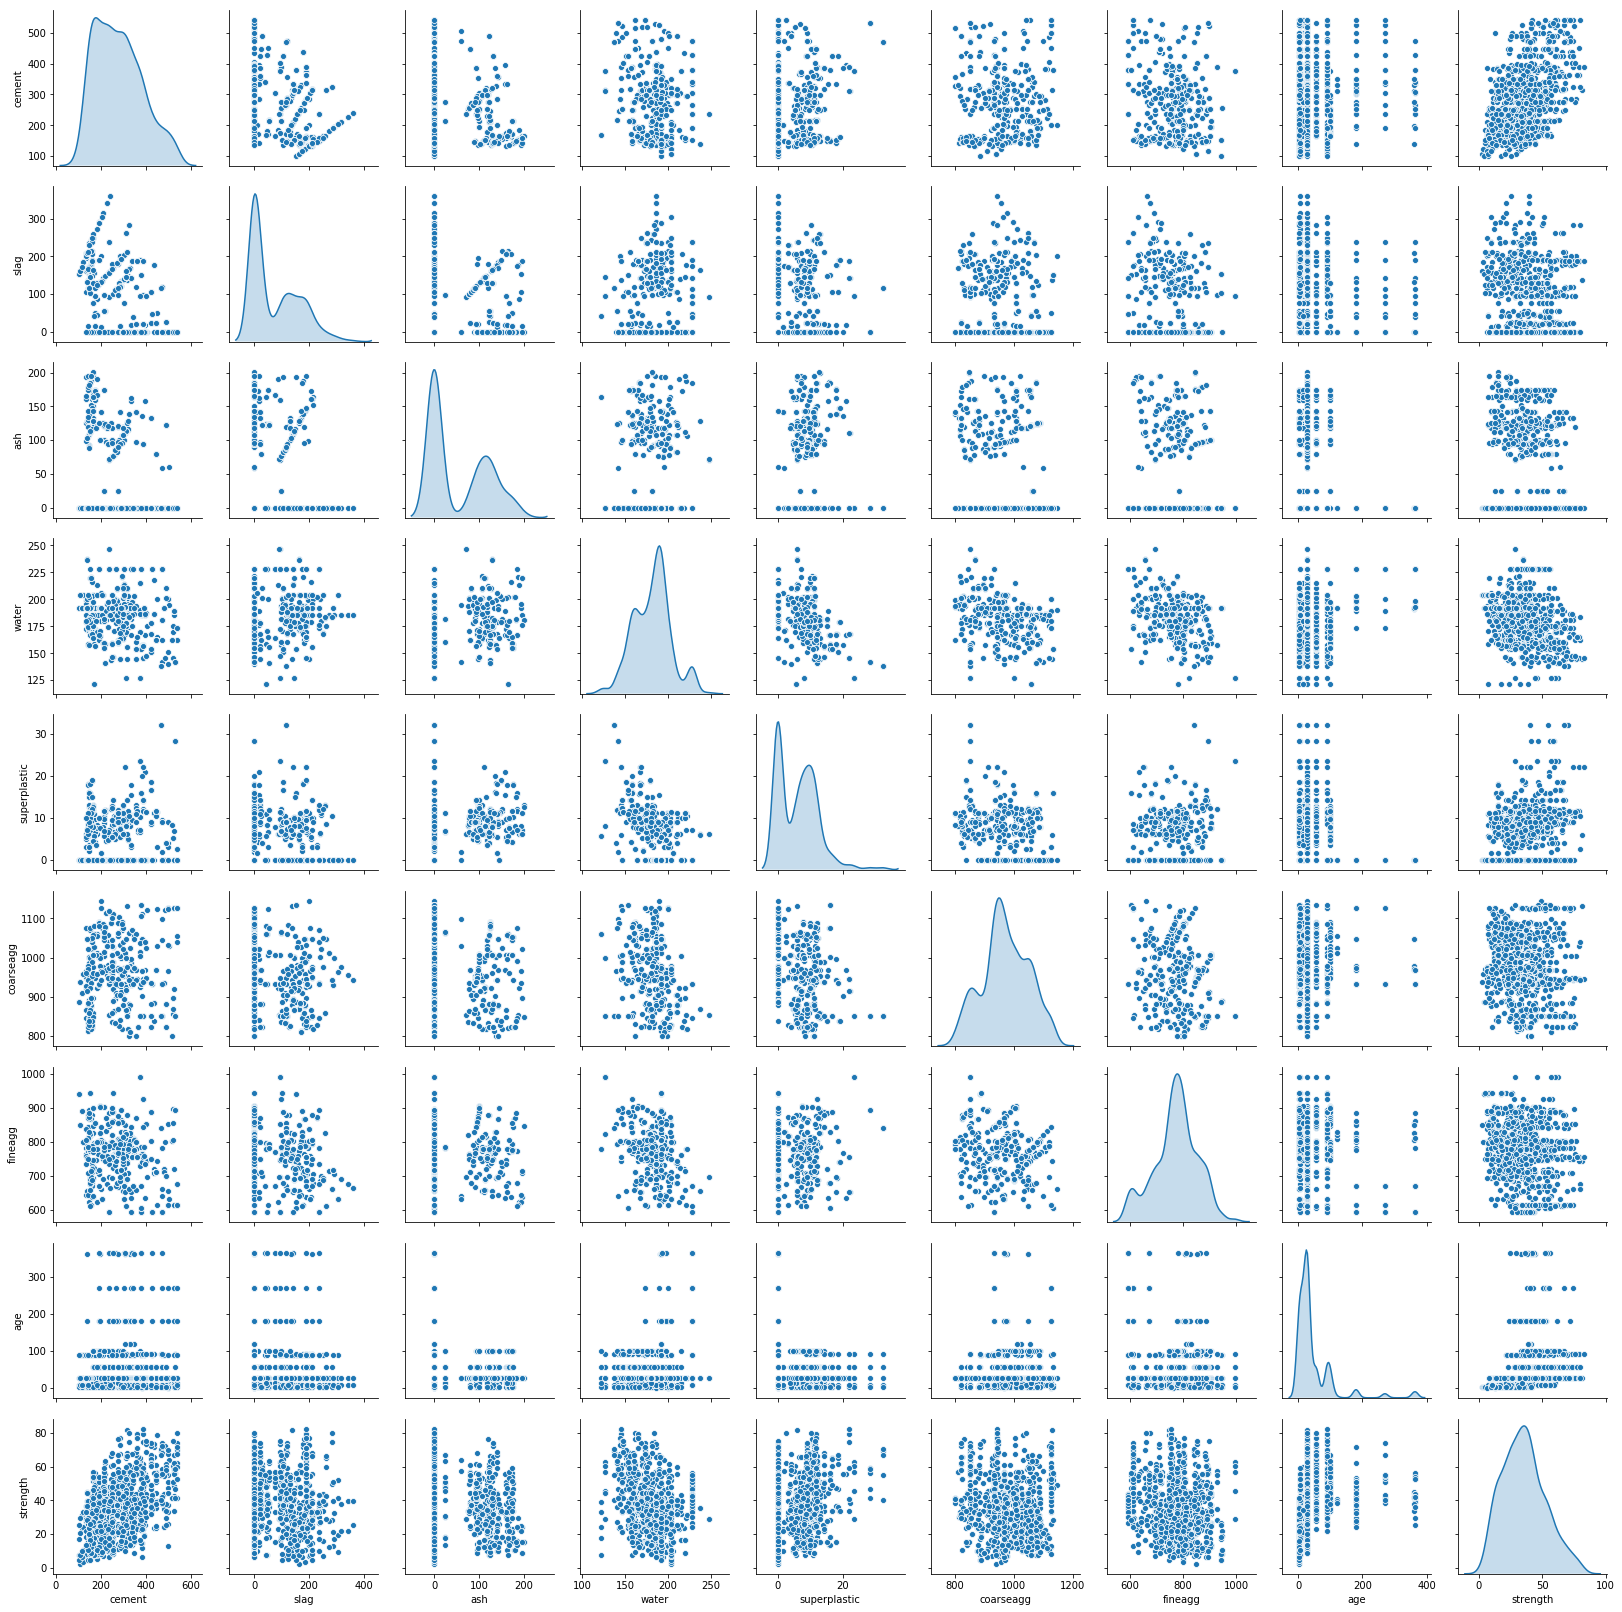

In [12]:
sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of 

In [13]:
# From the pair plot we see that off diagonal graphs are almost scattered like a cloud, which shows us that the independent columns do not influence each other.
# From the diagonal graphs we see that only strength is normally distributed to some extent, the other plots are having multiple gaussians, i.e having multiple peaks. 

# MODEL BUILT ON ORIGINAL RAW DATA

In [14]:
from scipy.stats import zscore

df_attr = df.loc[:, 'cement':'strength']
df_attr_z = df_attr.apply(zscore)


array = df_attr_z.values
X = array[:,0:8] 
y = array[:,8]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [15]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_pred = clr.predict(X_test)

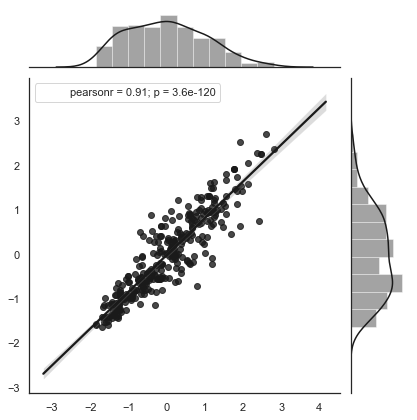

In [17]:
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

sns.set(style="darkgrid", color_codes=True)
            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);


In [18]:
##  Achieved 91 % of the test data from correlation analysis
# Let us explore the data for hidden stuctures or leverages to obtain a score higher than 91 if possible.

# KMeans Clustering

In [19]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,3.147316e+07
1,3,2.499599e+07
2,4,2.199491e+07
3,5,1.953861e+07


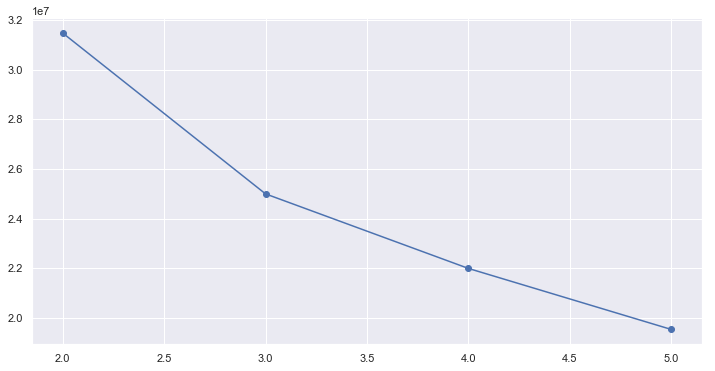

In [20]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [21]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [22]:
df_attr_z.shape

(1030, 9)

In [23]:
df_attr_z.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

# K means cluster analysis with 3 clusters

In [24]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

cluster = KMeans( n_clusters = 3, random_state = 1234 )
cluster.fit(df_attr_z)

prediction=cluster.predict(df_attr_z)
df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

df_attr_z_copy = df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [25]:
centroids = cluster.cluster_centers_
centroids

array([[-0.62375205, -0.42230513,  1.14094855, -0.29432634,  0.41340669,
         0.10321448,  0.23292867, -0.16690295, -0.24295822],
       [ 0.0536293 ,  0.1315908 , -0.79630495,  0.69179239, -0.87820168,
         0.25003637, -0.26851662,  0.24548169, -0.35620758],
       [ 0.97789238,  0.47282031, -0.40192412, -0.8623689 ,  1.02559721,
        -0.67607356,  0.12838409, -0.19741904,  1.1299039 ]])

In [26]:
df_attr_z.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'GROUP'],
      dtype='object')

In [27]:
centroid_df = pd.DataFrame(centroids, columns = list(df_attr) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.623752,-0.422305,1.140949,-0.294326,0.413407,0.103214,0.232929,-0.166903,-0.242958
1,0.053629,0.131591,-0.796305,0.691792,-0.878202,0.250036,-0.268517,0.245482,-0.356208
2,0.977892,0.472820,-0.401924,-0.862369,1.025597,-0.676074,0.128384,-0.197419,1.129904


In [28]:
## Instead of interpreting the numerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266DC9B2588>,
      dtype=object)

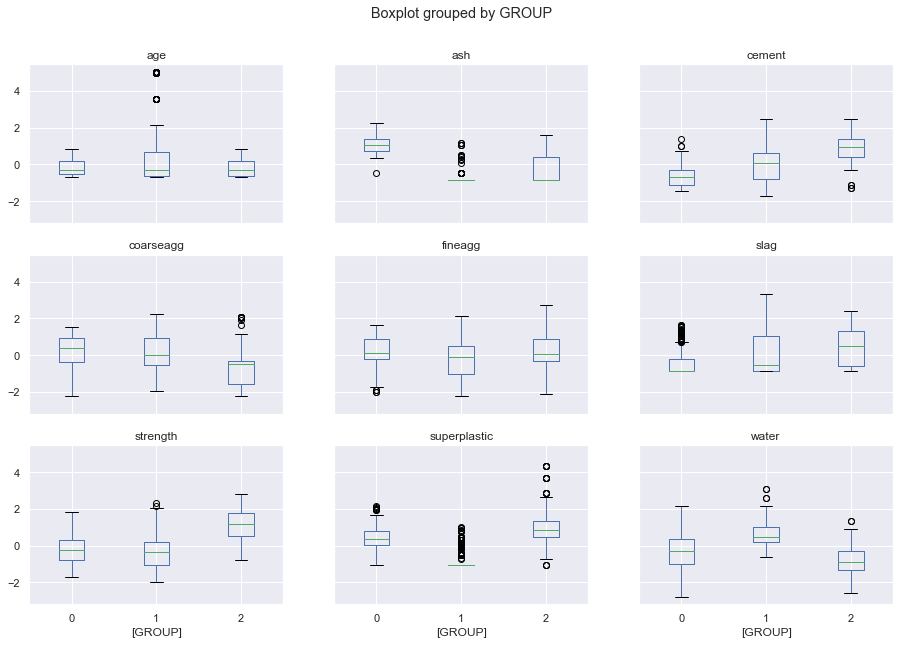

In [29]:
import matplotlib.pylab as plt

df_attr_z.boxplot(by = 'GROUP' , figsize=(15, 10))


In [30]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now


In [31]:
## Identifying and handling outliers

In [32]:
# Addressing outliers at group level

data = df_attr_z   # Renaming it to data. data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_attr_z['GROUP']))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266DE2E9E80>,
      dtype=object)

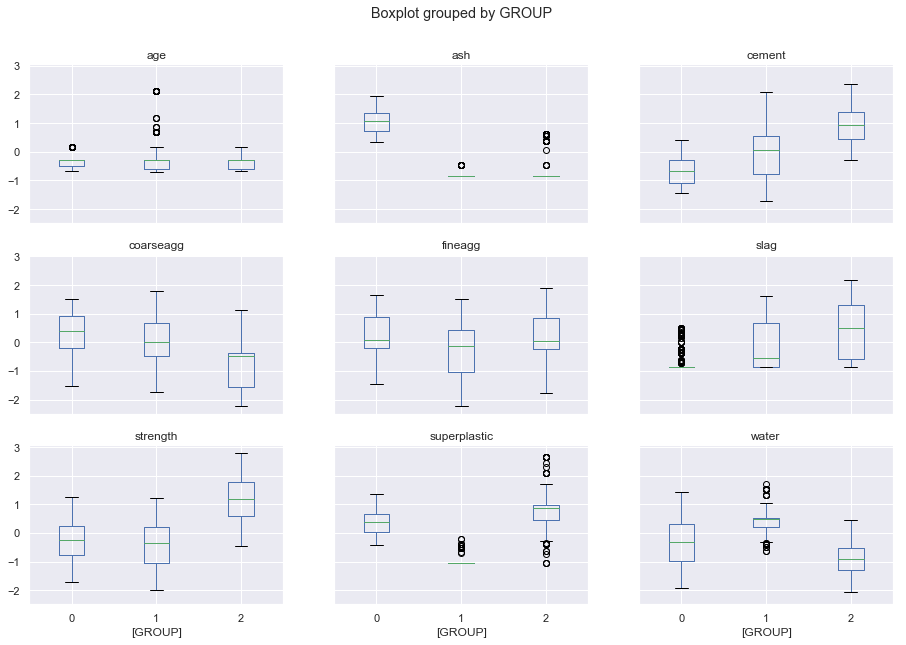

In [33]:
concat_data.boxplot(by = 'GROUP', figsize=(15, 10))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers is not much less compared to the  original outliers so we do not accept them for future analysis. We keep the dataset as it is.

In [34]:
# Let us analyze the strenngth column vs other columns group wise. 

In [35]:
columns = data.columns

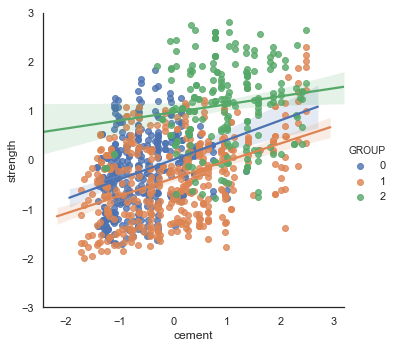

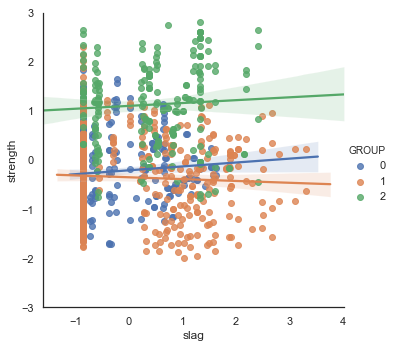

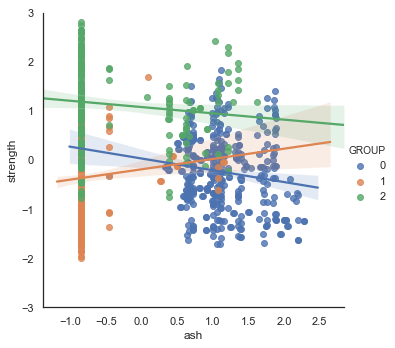

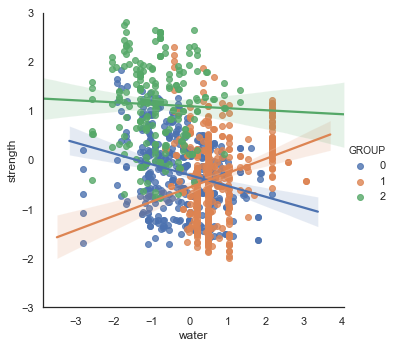

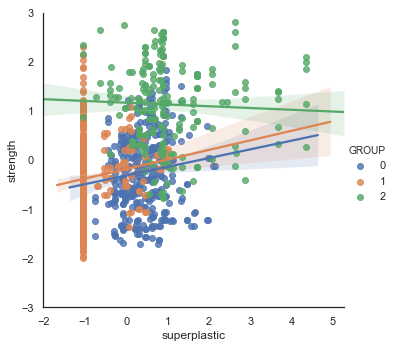

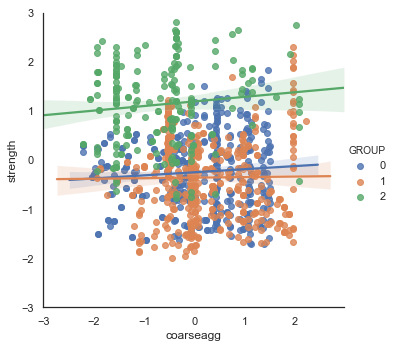

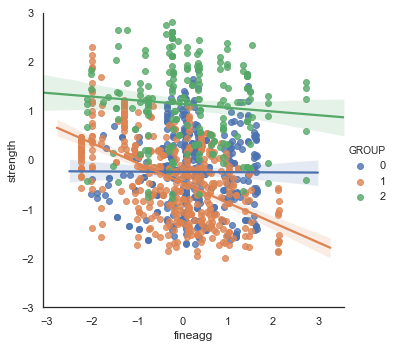

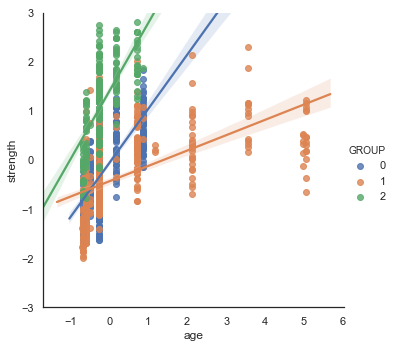

In [36]:
 for x in columns:
        var=x
        if not(x== 'strength' or x=='GROUP'):
            with sns.axes_style("white"):
                    plot = sns.lmplot(var,'strength',data=data,hue='GROUP')
            plot.set(ylim = (-3,3))


In [37]:
# We find from the above graphs that none of the attributes are good predictor for the strength colummn. The best fit lines for the clusters are almost horizontal which means weak predictor and the data points are highly scattered.

In [38]:
# Also cluster representing group 2 is of concrete havingt high strength but the other two clusters having low or medium strength with no sharp differences

# K means cluster analysis with 4 clusters

In [39]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

df_attr = df.loc[:, 'cement':'strength']
df_attr_z = df_attr.apply(zscore)

cluster = KMeans( n_clusters = 4, random_state = 1234 )
cluster.fit(df_attr_z)

prediction=cluster.predict(df_attr_z)
df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

df_attr_z_copy = df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [40]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.99411454,  0.44910724, -0.39310349, -0.85908067,  1.01338208,
        -0.6725557 ,  0.12244815, -0.19560276,  1.14211791],
       [-0.07670187,  0.21478002, -0.79179853,  0.55059077, -0.8398304 ,
         0.29838479, -0.11516484, -0.27868597, -0.54373692],
       [ 0.67896907, -0.22595549, -0.84714393,  1.41378316, -1.03914281,
        -0.01164038, -1.04526896,  2.95800897,  0.57822808],
       [-0.62375205, -0.42230513,  1.14094855, -0.29432634,  0.41340669,
         0.10321448,  0.23292867, -0.16690295, -0.24295822]])

In [41]:
centroid_df = pd.DataFrame(centroids, columns = list(df_attr) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.994115,0.449107,-0.393103,-0.859081,1.013382,-0.672556,0.122448,-0.195603,1.142118
1,-0.076702,0.214780,-0.791799,0.550591,-0.839830,0.298385,-0.115165,-0.278686,-0.543737
2,0.678969,-0.225955,-0.847144,1.413783,-1.039143,-0.011640,-1.045269,2.958009,0.578228
3,-0.623752,-0.422305,1.140949,-0.294326,0.413407,0.103214,0.232929,-0.166903,-0.242958


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266DE773BE0>,
      dtype=object)

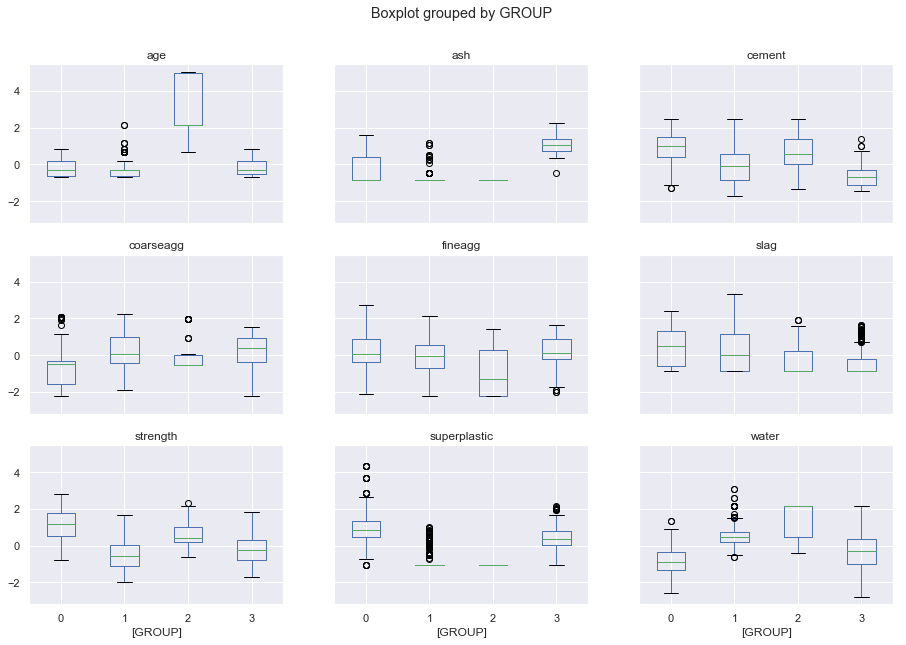

In [42]:
import matplotlib.pylab as plt

df_attr_z.boxplot(by = 'GROUP' , figsize=(15, 10))


In [43]:
data=df_attr_z

In [44]:
columns = data.columns

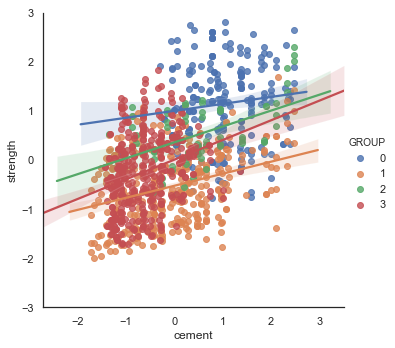

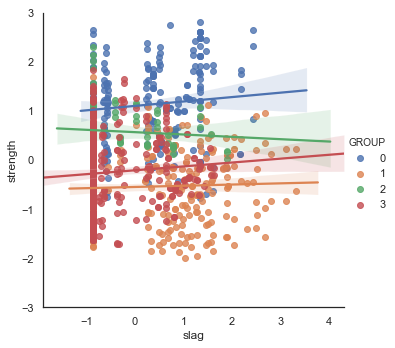

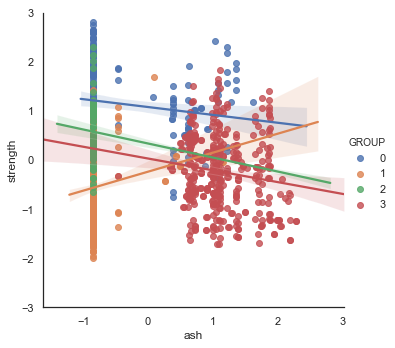

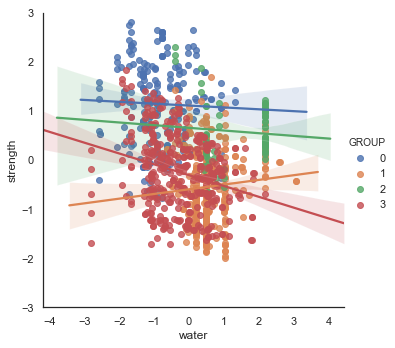

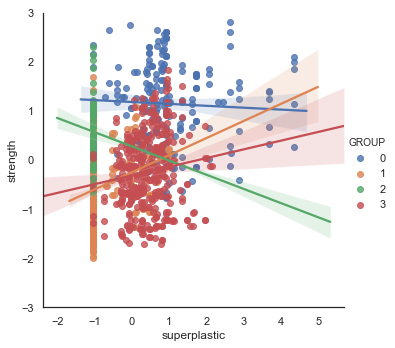

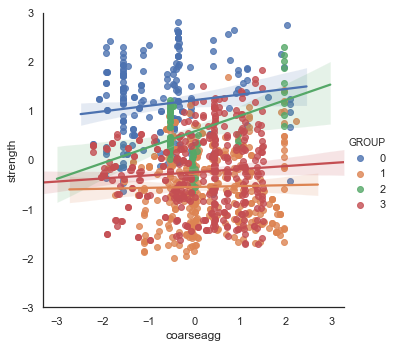

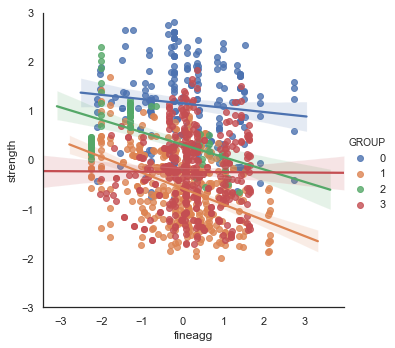

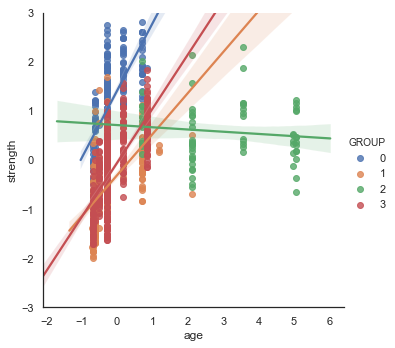

In [45]:
 for x in columns:
        var=x
        if not(x== 'strength' or x=='GROUP'):
            with sns.axes_style("white"):
                    plot = sns.lmplot(var,'strength',data=data,hue='GROUP')
            plot.set(ylim = (-3,3))

In [46]:
# Again from the above graphs we find that none of the attributes are good predictors for strength in all the clusters. Hence K means do not help much to find any hidden structures.

In [47]:
# For this problem we cant use PCA as the attributes are spread like a sphere/cloud as evident for pairplot which means they do not influence each other heavily or in a simple word the independent variables have almost no correlation among them.

In [48]:
# Different attributes play different role in different clusters hence building a single model is not a good option for this. 

# DecisionTreeRegressor

In [49]:
# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

In [50]:
from scipy.stats import zscore

df_attr = df.loc[:, 'cement':'strength']
df_attr_z = df_attr.apply(zscore)


array = df_attr_z.values
X = array[:,0:8] 
y = array[:,8]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [51]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)
regressor.fit(X_train , y_train)
print(dict(zip(df_attr.columns, regressor.feature_importances_)))

{'cement': 0.46405784978595876, 'slag': 0.0, 'ash': 0.0, 'water': 0.08815855548933857, 'superplastic': 0.0, 'coarseagg': 0.0, 'fineagg': 0.0, 'age': 0.4477835947247027}


In [52]:
df_attr.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [53]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = df_attr.columns[0:8]
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.46405785 0.         0.         0.08815856 0.         0.
 0.         0.44778359]
Index(['cement', 'age', 'water', 'fineagg', 'coarseagg', 'superplastic', 'ash',
       'slag'],
      dtype='object') [0.46405785 0.         0.         0.08815856 0.         0.
 0.         0.44778359]


In [54]:
y_pred = regressor.predict(X_test)

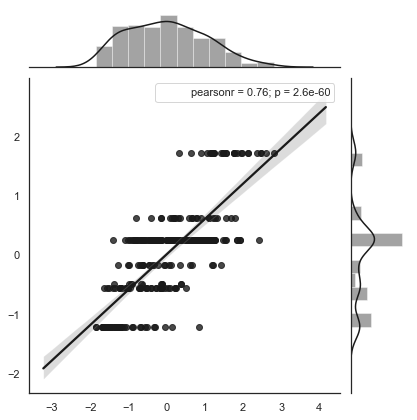

In [55]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);

In [56]:
# So we get 76% of the test data using decision tree regressor

# DecisionTreeRegressor analysis after dropping the less relevant features

In [57]:
# 1. Droping less relevant features as we get from feature importance using DecisionTreeRegressor

X = df_attr_z.drop( ['strength','slag','ash', 'superplastic', 'coarseagg', 'fineagg'] , axis=1)
y = df_attr_z['strength']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [58]:
regressor.fit(X_train , y_train)
y_pred = regressor.predict(X_test)

regressor.feature_importances_

print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

             Imp
cement  0.464058
water   0.088159
age     0.447784


In [59]:
y_pred = regressor.predict(X_test)

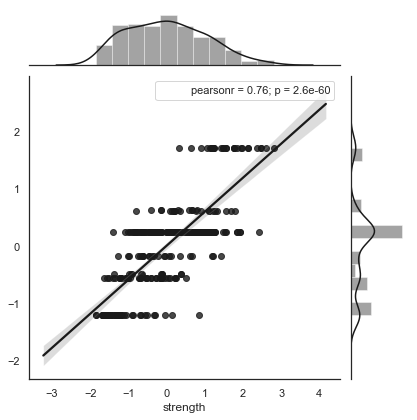

In [60]:
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);

# Now we see that even after dropping 5 columns from the dataset we still get same result of 76 %. This means that out of 8 features the important features are cement , water and age

In [61]:
# The result obtained from DecisionTreeRegressor is not satisfactory hence we move on to regularised linear regression

# linear regression Ridge and Lasso

In [62]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [63]:
# Copy all the predictor variables into X dataframe. 
X = df_attr.drop('strength', axis=1)

# Copy the 'mpg' strength alone into the y dataframe. This is the dependent variable
y = df_attr[['strength']]


In [64]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [66]:
# fit a simple linear model

In [67]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7917080306678752
The coefficient for slag is 0.5620608749496462
The coefficient for ash is 0.34747677102632063
The coefficient for water is -0.13186138372514944
The coefficient for superplastic is 0.13449876840644523
The coefficient for coarseagg is 0.11183689241537578
The coefficient for fineagg is 0.17370080312287323
The coefficient for age is 0.4175909779025137


In [68]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.013041400221605257


In [69]:
# Create a regularized RIDGE model and note the coefficients

In [70]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.78652136  0.55696657  0.34291358 -0.13534196  0.13450497  0.10831507
   0.16918324  0.41713594]]


In [71]:
# Create a regularized LASSO model and note the coefficients

In [72]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099 -0.
 -0.          0.2543608 ]


In [73]:
## Let us compare their scores

In [74]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6031487540630229
0.6339136715208276


In [75]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.603144790939098
0.6340333563625518


In [76]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.5215627623725142
0.51856614888699


In [77]:
# From linear regression models we get very poor score compared to the other models hence we need to do analysis with polynomial model

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [80]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [81]:
# Fit a simple non regularized linear model on poly features-

In [82]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 5.02512283e-17  1.34777181e+01  1.01453909e+01  6.05814040e+00
 -1.56595255e+00  4.25130927e+00  1.23634849e+00  2.53761032e+00
  1.49772131e+01  7.59594704e-01  1.15681909e+00 -3.90120685e+00
 -1.73806869e+00  3.29193411e-01  6.17368282e-01  2.91053268e+00
  1.76307429e+00 -1.63204600e+00  5.21667573e-01  3.68167194e-01
  2.08128646e+00  4.26397239e+00 -2.31745785e+00 -2.32994460e+00
  2.58685837e-01  1.97858614e+00  6.75668908e+00  1.96653055e+00
 -1.09589014e+00 -3.09952083e-01 -9.61638886e-01  1.77590106e+00
  9.90577456e-01  2.40653442e+00  1.63052044e+00 -3.01539427e-01
  1.84973490e+00]


In [83]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         13.3230364   9.98806788  5.92007287 -1.6769773   4.24346992
   1.14709561  2.40295661 14.94433259  0.75048865  1.15780428 -3.8556977
  -1.72087746  0.33506201  0.61718292  2.7638557   1.74523077 -1.60892884
   0.5291864   0.35781419  2.0722416   4.15030544 -2.26730837 -2.32755965
   0.26752031  1.98410524  6.6046349   1.97079137 -1.07823346 -0.3095362
  -1.03929564  1.77010082  0.98752549  2.43497624  1.63032432 -0.31792245
   1.73711233]]


In [84]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7549463250929687
0.7444379607063953


In [85]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.         12.95711163  9.59317708  5.56241425 -1.93810238  4.21165184
  0.92567816  2.09554658 14.88840343  0.69426378  1.08237414 -3.65259792
 -1.71422299  0.28595558  0.59790307  2.25336105  1.63038428 -1.47383575
  0.49781242  0.27234393  2.03103573  3.75939362 -2.07518639 -2.33537427
  0.22372387  1.95973654  6.14359589  1.89575026 -1.02176875 -0.27259848
 -1.27000962  1.73113555  0.8975625   2.55176152  1.59729449 -0.36995176
  1.34962187]


In [86]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7547590604429038
0.7441326585099639


In [87]:
# This time there is a slight increase in the score compared to the linear models earlier, however it is far from what we expect. 

# Model Tuning

In [88]:
df_attr = df.loc[:, 'cement':'strength']

In [89]:
df.head(6)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86


In [90]:
df_attr.head(6)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86


In [91]:
# Copy all the predictor variables into X dataframe. 
X = df_attr.drop('strength', axis=1)

# opy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df_attr[['strength']]


In [92]:
X.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14


In [93]:
y.head(2)

,strength
0,29.89
1,23.51


In [94]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [95]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.12655755592921436
The coefficient for slag is 0.10882841423627
The coefficient for ash is 0.09070514083244792
The coefficient for water is -0.10315724008089974
The coefficient for superplastic is 0.37612343073244137
The coefficient for coarseagg is 0.024028594961397042
The coefficient for fineagg is 0.036192894560112265
The coefficient for age is 0.11043496734221787


In [97]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -52.963271158913145


In [98]:
regression_model.score(X_train, y_train)

0.603148754063023

In [99]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.6339136715208276

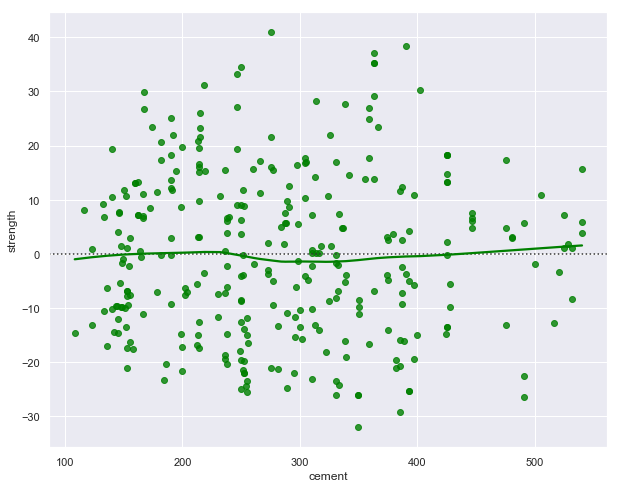

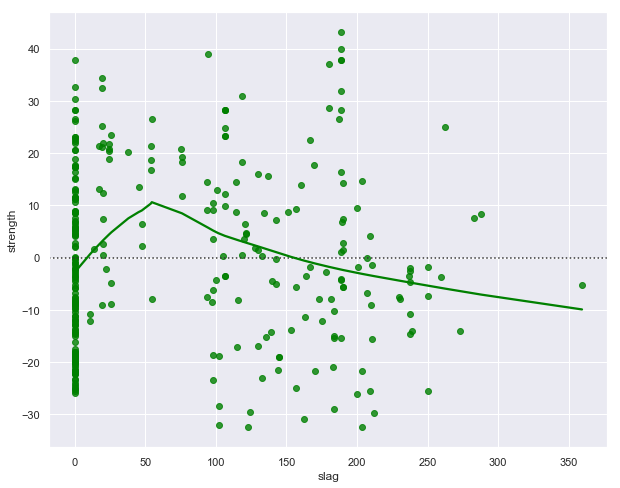

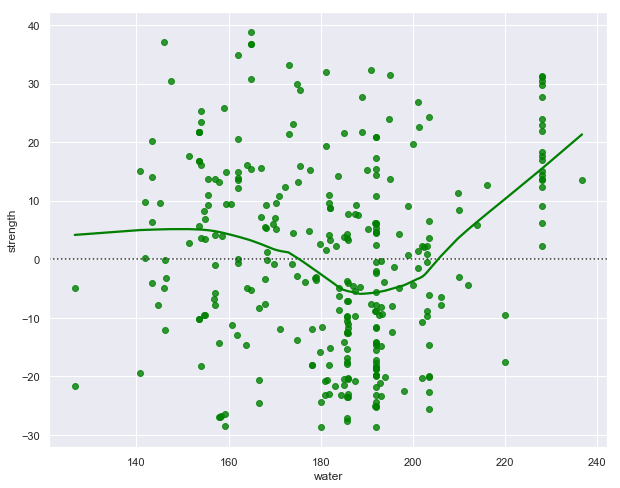

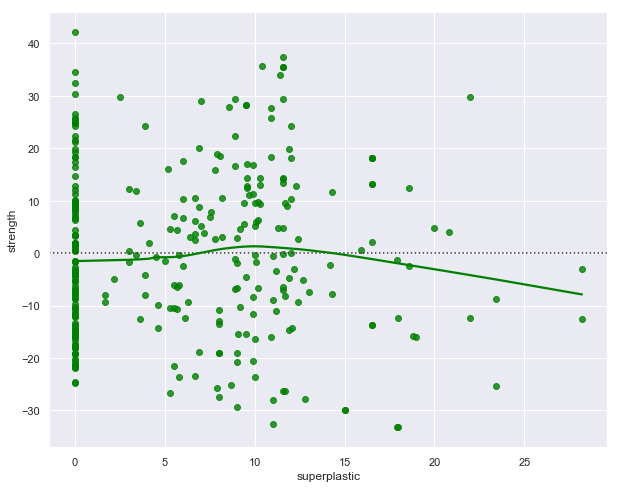

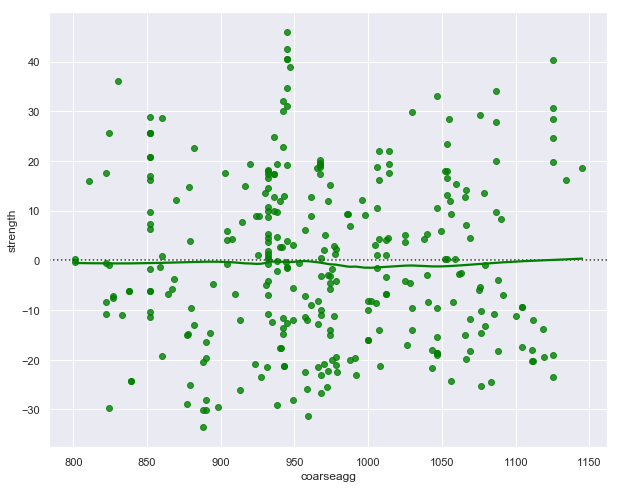

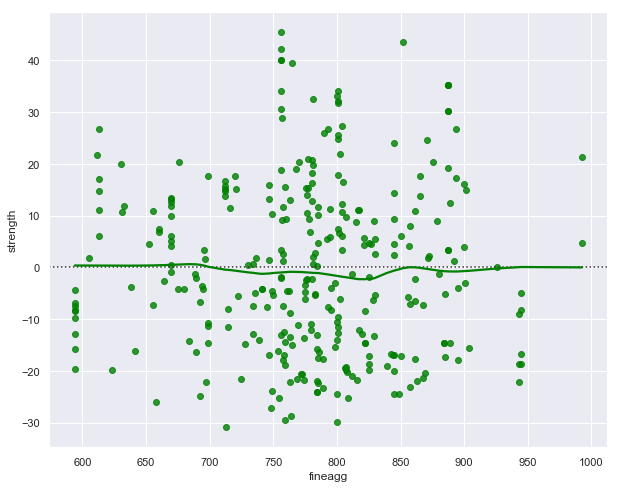

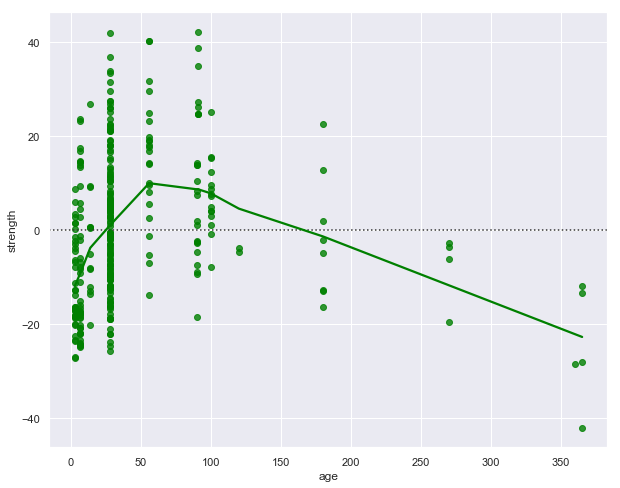

In [100]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for each predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['cement'], y= y_test['strength'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['slag'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['water'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['superplastic'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['coarseagg'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['fineagg'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['age'], y= y_test['strength'], color='green', lowess=True )

In [101]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91,64.90
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3,11.36
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7,32.82
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87


In [102]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -52.963271
cement           0.126558
slag             0.108828
ash              0.090705
water           -0.103157
superplastic     0.376123
coarseagg        0.024029
fineagg          0.036193
age              0.110435
dtype: float64

In [103]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sat, 31 Aug 2019   Prob (F-statistic):          2.18e-137
Time:                        13:46:46   Log-Likelihood:                -2712.8
No. Observations:                 721   AIC:                             5444.
Df Residuals:                     712   BIC:                             5485.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -52.9633     31.085     -1.704   

In [104]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [105]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math

math.sqrt(mse)

10.32209298536421

In [106]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

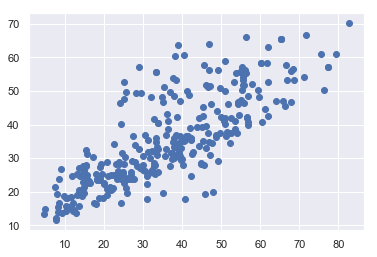

In [107]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values



plt.scatter(y_test['strength'], y_pred)


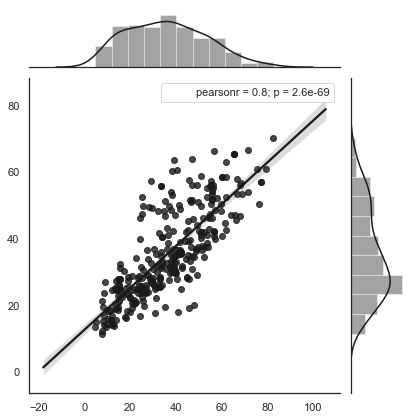

In [108]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);

In [109]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [110]:
# How do we improve the model? the R^2 is .8, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 


In [111]:
from scipy.stats import zscore

df_scaled  = df.apply(zscore)

In [112]:
#convert the numpy array back into a dataframe 

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [113]:
#browse the contents of the dataframe. Check that all the values are now z scores

df_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


In [114]:
# Copy all the predictor variables into X dataframe. 
X = df_scaled.drop('strength', axis=1)

# opy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df_scaled[['strength']]

In [115]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


In [116]:
y.head()

,strength
0,-0.355018
1,-0.737108
2,-0.395144
3,0.600806
4,-1.049727


In [117]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [118]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.7917080306678752
The coefficient for slag is 0.5620608749496462
The coefficient for ash is 0.34747677102632063
The coefficient for water is -0.13186138372514944
The coefficient for superplastic is 0.13449876840644523
The coefficient for coarseagg is 0.11183689241537578
The coefficient for fineagg is 0.17370080312287323
The coefficient for age is 0.4175909779025137


In [120]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.013041400221605257


In [121]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.6339136715208276

In [122]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [123]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.6181771145034818

In [124]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

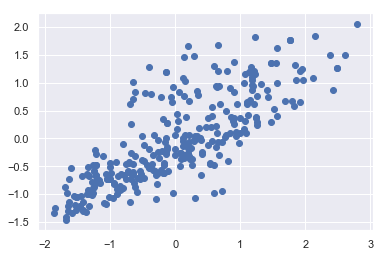

In [125]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['strength'], y_pred)

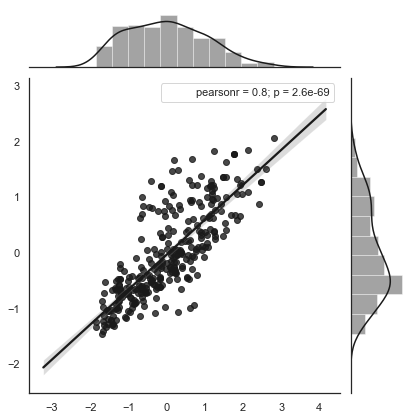

In [126]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);

In [127]:
# Even after scaling the dataset we get same score of 0.8, therefore we move forward to tune our model using different algorithms

# Analysing the model and tuning the same with SVM

In [128]:
from sklearn.svm import SVR

In [129]:
from scipy.stats import zscore

df_attr = df.loc[:, 'cement':'strength']
df_attr_z = df_attr.apply(zscore)


array = df_attr_z.values
X = array[:,0:8] 
y = array[:,8]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [130]:

#Grid search to tune model parameters for SVR
from sklearn.model_selection import GridSearchCV

model = SVR()

params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}

model1 = GridSearchCV(model, param_grid=params, verbose=5)

model1.fit(X_train, y_train)

print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.5648401213320523, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] ... C=0.01, kernel=linear, score=0.548562235542501, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.5670506184942217, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.1874932613027902, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .... C=0.01, kernel=rbf, score=0.18294899020428856, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ...... C=0.01, kernel=rbf, score=0.195751978828262, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, k

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.5, kernel=rbf, score=0.7925015072636075, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.7631735962171624, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.7792530167794003, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.5681796626125475, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.5793507066798722, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.5077504995179298, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.8221794894079171, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished


In [131]:
# Best Hyper Parameters:
# {'C': 1, 'kernel': 'rbf'}

In [132]:
from sklearn import svm
clr = svm.SVR(C=1.0,kernel='rbf')  
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

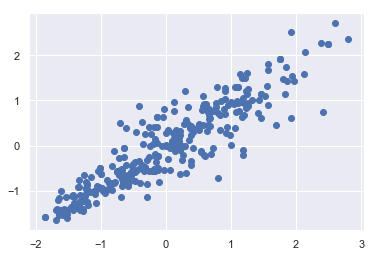

In [133]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

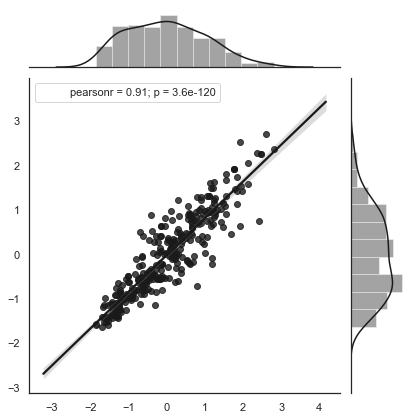

In [134]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);

In [135]:
# Now we see that the performance increased to 91% from 80 % when we use SVM

# Ensemble techniques with SVM model with best hyper paramerters

In [136]:
# Breaking dataset into two parts the independent variables and the dependent/Target variable
df_attr = df.loc[:, 'cement':'strength']
df_attr_z = df_attr.apply(zscore)


array = df_attr_z.values
X = array[:,0:8] 
y = array[:,8]   

#                             Ensemble Learning - Bagging

In [137]:
from sklearn.ensemble import BaggingRegressor
iterationList=np.random.randint(1,100,5)
itr=1
svm_model = svm.SVR(C=1.0,kernel='rbf') 
for i in iterationList:
    treeseed = i
    bgcl = BaggingRegressor(base_estimator=svm_model, n_estimators=100, random_state=treeseed)
    for j in iterationList:
        seed=j
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
        bgcl = bgcl.fit(X_train, y_train)
        #Prediction on test set
        prediction = bgcl.predict(X_test)
        # Accuracy on test set
        accuracy =  bgcl.score(X_test, y_test)
        expected=y_test
        print("Iteration ",itr)
        itr=itr+1
        print()
        print("Bagging random state ",treeseed)
        print("data split random state ",seed)
        print("Overall score ",accuracy)
        print("----------------------------------------------------")

Iteration  1

Bagging random state  52
data split random state  52
Overall score  0.8097227882590035
----------------------------------------------------
Iteration  2

Bagging random state  52
data split random state  58
Overall score  0.8309966229730369
----------------------------------------------------
Iteration  3

Bagging random state  52
data split random state  1
Overall score  0.8315173255403884
----------------------------------------------------
Iteration  4

Bagging random state  52
data split random state  18
Overall score  0.8207558601966464
----------------------------------------------------
Iteration  5

Bagging random state  52
data split random state  21
Overall score  0.8383411936392074
----------------------------------------------------
Iteration  6

Bagging random state  58
data split random state  52
Overall score  0.808826650665436
----------------------------------------------------
Iteration  7

Bagging random state  58
data split random state  58
Overall sco

# Ensemble Learning - AdaBoosting

In [138]:
from sklearn.ensemble import AdaBoostRegressor
iterationList=np.random.randint(1,100,5)
itr=1
svm_model = svm.SVR(C=1.0,kernel='rbf')
for i in iterationList:
    treeseed = i
    abcl = AdaBoostRegressor(base_estimator=svm_model, n_estimators=100, random_state=treeseed)
    
    for j in iterationList:
        seed=j
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
        abcl = abcl.fit(X_train, y_train)
        #Prediction on test set
        prediction = abcl.predict(X_test)
        # Accuracy on test set
        accuracy =  abcl.score(X_test, y_test)
        expected=y_test
        print("Iteration ",itr)
        itr=itr+1
        print()
        print("AdaBoosting random state ",treeseed)
        print("data split random state ",seed)
        print("Overall score ",accuracy)
        print("----------------------------------------------------")

Iteration  1

AdaBoosting random state  40
data split random state  40
Overall score  0.8329619693219612
----------------------------------------------------
Iteration  2

AdaBoosting random state  40
data split random state  57
Overall score  0.8447271189035475
----------------------------------------------------
Iteration  3

AdaBoosting random state  40
data split random state  75
Overall score  0.8476692340402032
----------------------------------------------------
Iteration  4

AdaBoosting random state  40
data split random state  86
Overall score  0.8334674769871037
----------------------------------------------------
Iteration  5

AdaBoosting random state  40
data split random state  83
Overall score  0.827030779732155
----------------------------------------------------
Iteration  6

AdaBoosting random state  57
data split random state  40
Overall score  0.8121893890511831
----------------------------------------------------
Iteration  7

AdaBoosting random state  57
data split

# Analysing the dataset and tuning the same with Decision Tree

In [139]:
# Finding best hyper parameters for Decision tree

In [140]:
from sklearn.model_selection import GridSearchCV
clf_tree=DecisionTreeRegressor()

parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}

clf=GridSearchCV(clf_tree,param_grid=parameters,verbose=5)

clf.fit(X_train, y_train)

print("Best Hyper Parameters:\n", clf.best_params_)

Fitting 3 folds for each of 250 candidates, totalling 750 fits
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.18590329539123515, total=   0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.28823956654767013, total=   0.0s
[CV] max_depth=1, min_samples_split=10 ...............................
[CV]  max_depth=1, min_samples_split=10, score=0.13492397046632398, total=   0.0s
[CV] max_depth=1, min_samples_split=30 ...............................
[CV]  max_depth=1, min_samples_split=30, score=0.18590329539123515, total=   0.0s
[CV] max_depth=1, min_samples_split=30 ...............................
[CV]  max_depth=1, min_samples_split=30, score=0.28823956654767013, total=   0.0s
[CV] max_depth=1, min_samples_split=30 ...............................
[CV]  max_depth=1, min_samples_split=30, score=0.13492397046632387, total=   0.0s
[CV] max_depth=1, m

[CV]  max_depth=3, min_samples_split=270, score=0.29081876007731544, total=   0.0s
[CV] max_depth=3, min_samples_split=290 ..............................
[CV]  max_depth=3, min_samples_split=290, score=0.40234583082185393, total=   0.0s
[CV] max_depth=3, min_samples_split=290 ..............................
[CV]  max_depth=3, min_samples_split=290, score=0.46250923247407094, total=   0.0s
[CV] max_depth=3, min_samples_split=290 ..............................
[CV]  max_depth=3, min_samples_split=290, score=0.2908187600773152, total=   0.0s
[CV] max_depth=3, min_samples_split=310 ..............................
[CV]  max_depth=3, min_samples_split=310, score=0.40234583082185393, total=   0.0s
[CV] max_depth=3, min_samples_split=310 ..............................
[CV]  max_depth=3, min_samples_split=310, score=0.46250923247407105, total=   0.0s
[CV] max_depth=3, min_samples_split=310 ..............................
[CV]  max_depth=3, min_samples_split=310, score=0.29081876007731555, total=  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, min_samples_split=450 ..............................
[CV]  max_depth=3, min_samples_split=450, score=0.1859032953912354, total=   0.0s
[CV] max_depth=3, min_samples_split=450 ..............................
[CV]  max_depth=3, min_samples_split=450, score=0.28823956654767013, total=   0.0s
[CV] max_depth=3, min_samples_split=450 ..............................
[CV]  max_depth=3, min_samples_split=450, score=0.13492397046632387, total=   0.0s
[CV] max_depth=3, min_samples_split=470 ..............................
[CV]  max_depth=3, min_samples_split=470, score=0.18590329539123515, total=   0.0s
[CV] max_depth=3, min_samples_split=470 ..............................
[CV]  max_depth=3, min_samples_split=470, score=0.28823956654767013, total=   0.0s
[CV] max_depth=3, min_samples_split=470 ..............................
[CV]  max_depth=3, min_samples_split=470, score=0.13492397046632387, total=   0.0s
[CV] max_depth=3, min_samples_split=490 ..............................
[CV] 

[CV] max_depth=7, min_samples_split=90 ...............................
[CV]  max_depth=7, min_samples_split=90, score=0.668059083264389, total=   0.0s
[CV] max_depth=7, min_samples_split=90 ...............................
[CV]  max_depth=7, min_samples_split=90, score=0.5132638691948274, total=   0.0s
[CV] max_depth=7, min_samples_split=110 ..............................
[CV]  max_depth=7, min_samples_split=110, score=0.5343882350132251, total=   0.0s
[CV] max_depth=7, min_samples_split=110 ..............................
[CV]  max_depth=7, min_samples_split=110, score=0.6281690859674585, total=   0.0s
[CV] max_depth=7, min_samples_split=110 ..............................
[CV]  max_depth=7, min_samples_split=110, score=0.5132638691948272, total=   0.0s
[CV] max_depth=7, min_samples_split=130 ..............................
[CV]  max_depth=7, min_samples_split=130, score=0.5081636741027475, total=   0.0s
[CV] max_depth=7, min_samples_split=130 ..............................
[CV]  max_dept

[CV]  max_depth=11, min_samples_split=10, score=0.7601607769820641, total=   0.0s
[CV] max_depth=11, min_samples_split=10 ..............................
[CV]  max_depth=11, min_samples_split=10, score=0.8252640071038874, total=   0.0s
[CV] max_depth=11, min_samples_split=10 ..............................
[CV]  max_depth=11, min_samples_split=10, score=0.7126134356464042, total=   0.0s
[CV] max_depth=11, min_samples_split=30 ..............................
[CV]  max_depth=11, min_samples_split=30, score=0.7526144458436052, total=   0.0s
[CV] max_depth=11, min_samples_split=30 ..............................
[CV]  max_depth=11, min_samples_split=30, score=0.7805655188671863, total=   0.0s
[CV] max_depth=11, min_samples_split=30 ..............................
[CV]  max_depth=11, min_samples_split=30, score=0.6785923810848937, total=   0.0s
[CV] max_depth=11, min_samples_split=50 ..............................
[CV]  max_depth=11, min_samples_split=50, score=0.6737174082142856, total=   0.0s


[CV]  max_depth=13, min_samples_split=350, score=0.28823956654767013, total=   0.0s
[CV] max_depth=13, min_samples_split=350 .............................
[CV]  max_depth=13, min_samples_split=350, score=0.29081876007731544, total=   0.0s
[CV] max_depth=13, min_samples_split=370 .............................
[CV]  max_depth=13, min_samples_split=370, score=0.18590329539123515, total=   0.0s
[CV] max_depth=13, min_samples_split=370 .............................
[CV]  max_depth=13, min_samples_split=370, score=0.28823956654767025, total=   0.0s
[CV] max_depth=13, min_samples_split=370 .............................
[CV]  max_depth=13, min_samples_split=370, score=0.13492397046632387, total=   0.0s
[CV] max_depth=13, min_samples_split=390 .............................
[CV]  max_depth=13, min_samples_split=390, score=0.1859032953912354, total=   0.0s
[CV] max_depth=13, min_samples_split=390 .............................
[CV]  max_depth=13, min_samples_split=390, score=0.28823956654767013, t

[CV]  max_depth=17, min_samples_split=290, score=0.40234583082185393, total=   0.0s
[CV] max_depth=17, min_samples_split=290 .............................
[CV]  max_depth=17, min_samples_split=290, score=0.46250923247407105, total=   0.0s
[CV] max_depth=17, min_samples_split=290 .............................
[CV]  max_depth=17, min_samples_split=290, score=0.29081876007731555, total=   0.0s
[CV] max_depth=17, min_samples_split=310 .............................
[CV]  max_depth=17, min_samples_split=310, score=0.40234583082185393, total=   0.0s
[CV] max_depth=17, min_samples_split=310 .............................
[CV]  max_depth=17, min_samples_split=310, score=0.46250923247407094, total=   0.0s
[CV] max_depth=17, min_samples_split=310 .............................
[CV]  max_depth=17, min_samples_split=310, score=0.29081876007731555, total=   0.0s
[CV] max_depth=17, min_samples_split=330 .............................
[CV]  max_depth=17, min_samples_split=330, score=0.1859032953912354, t

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    1.0s finished


In [141]:
# Best Hyper parameters
# {'max_depth': 17, 'min_samples_split': 10}
# Building decision tree with best hyper parameters

# Building decision trees using best hyper parameters

In [151]:
iterationList=np.random.randint(1,100,5)
itr=1
for i in iterationList:
    treeseed = i
    clf_pruned = DecisionTreeRegressor(max_depth =17, min_samples_split= 10,random_state=treeseed)
    for j in iterationList:
        seed=j
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
        clf_pruned.fit(X_train, y_train)
        #Prediction on test set
        prediction = clf_pruned.predict(X_test)
        # Accuracy on test set
        accuracy =  clf_pruned.score(X_test, y_test)
        expected=y_test
        print("Iteration ",itr)
        itr=itr+1
        print()
        print("Regularised Decision tree random state ",treeseed)
        print("data split random state ",seed)
        print("Overall score ",accuracy)
        print("----------------------------------------------------")

Iteration  1

Regularised Decision tree random state  43
data split random state  43
Overall score  0.8184702595015774
----------------------------------------------------
Iteration  2

Regularised Decision tree random state  43
data split random state  77
Overall score  0.8487138246659547
----------------------------------------------------
Iteration  3

Regularised Decision tree random state  43
data split random state  34
Overall score  0.8428496577799764
----------------------------------------------------
Iteration  4

Regularised Decision tree random state  43
data split random state  30
Overall score  0.7891778116066809
----------------------------------------------------
Iteration  5

Regularised Decision tree random state  43
data split random state  20
Overall score  0.8463690226464547
----------------------------------------------------
Iteration  6

Regularised Decision tree random state  77
data split random state  43
Overall score  0.8269686949454405
---------------------

In [154]:
# With Regularized decision trees we get a highest score of 85% at iteration 15

#                             Ensemble Learning - Bagging

In [155]:
from sklearn.ensemble import BaggingRegressor
iterationList=np.random.randint(1,100,5)
itr=1
for i in iterationList:
    treeseed = i
    num = np.random.randint(0,100)
    dt_model = DecisionTreeRegressor(random_state=num )
    bgcl = BaggingRegressor(base_estimator=dt_model, n_estimators=100, random_state=treeseed)
    for j in iterationList:
        seed=j
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
        bgcl = bgcl.fit(X_train, y_train)
        #Prediction on test set
        prediction = bgcl.predict(X_test)
        # Accuracy on test set
        accuracy =  bgcl.score(X_test, y_test)
        expected=y_test
        print("Iteration ",itr)
        itr=itr+1
        print()
        print("DecisionTreeRegressor random state ",num)
        print("Bagging random state ",treeseed)
        print("data split random state ",seed)
        print("Overall score ",accuracy)
        print("----------------------------------------------------")

Iteration  1

DecisionTreeRegressor random state  82
Bagging random state  15
data split random state  15
Overall score  0.9008092467959437
----------------------------------------------------
Iteration  2

DecisionTreeRegressor random state  82
Bagging random state  15
data split random state  67
Overall score  0.9193628448711391
----------------------------------------------------
Iteration  3

DecisionTreeRegressor random state  82
Bagging random state  15
data split random state  2
Overall score  0.8986094668159299
----------------------------------------------------
Iteration  4

DecisionTreeRegressor random state  82
Bagging random state  15
data split random state  71
Overall score  0.8980496724433312
----------------------------------------------------
Iteration  5

DecisionTreeRegressor random state  82
Bagging random state  15
data split random state  97
Overall score  0.9149815114667251
----------------------------------------------------
Iteration  6

DecisionTreeRegressor 

In [156]:
# We get the highest score at iteration 7 with a score of 91.92%

# Ensemble Learning - AdaBoosting

In [157]:
from sklearn.ensemble import AdaBoostRegressor
iterationList=np.random.randint(1,100,5)
itr=1
for i in iterationList:
    treeseed = i
    num = np.random.randint(0,100)
    dt_model = DecisionTreeRegressor(random_state=num )
    abcl = AdaBoostRegressor(base_estimator=dt_model, n_estimators=100, random_state=treeseed)
    
    for j in iterationList:
        seed=j
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
        abcl = abcl.fit(X_train, y_train)
        #Prediction on test set
        prediction = abcl.predict(X_test)
        # Accuracy on test set
        accuracy =  abcl.score(X_test, y_test)
        expected=y_test
        print("Iteration ",itr)
        itr=itr+1
        print()
        print("AdaBoosting random state ",treeseed)
        print("data split random state ",seed)
        print("Overall score ",accuracy)
        print("----------------------------------------------------")

Iteration  1

AdaBoosting random state  86
data split random state  86
Overall score  0.8777997950770476
----------------------------------------------------
Iteration  2

AdaBoosting random state  86
data split random state  60
Overall score  0.8901316560770599
----------------------------------------------------
Iteration  3

AdaBoosting random state  86
data split random state  34
Overall score  0.8680812292075981
----------------------------------------------------
Iteration  4

AdaBoosting random state  86
data split random state  89
Overall score  0.8538317657322059
----------------------------------------------------
Iteration  5

AdaBoosting random state  86
data split random state  43
Overall score  0.8795309158063832
----------------------------------------------------
Iteration  6

AdaBoosting random state  60
data split random state  86
Overall score  0.8775461259756389
----------------------------------------------------
Iteration  7

AdaBoosting random state  60
data spli

In [158]:
# Although the result are satisfactory but it is not as good as Bagging

#                     Ensemble Learning - GradientBoost

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
iterationList=np.random.randint(1,1000,5)
itr=1
for i in iterationList:
    treeseed = i
    gbcl = GradientBoostingRegressor(n_estimators = 100, random_state=treeseed)
    
    for j in iterationList:
        seed=j
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
        gbcl = gbcl.fit(X_train, y_train)
        #Prediction on test set
        prediction = gbcl.predict(X_test)
        # Accuracy on test set
        accuracy =  gbcl.score(X_test, y_test)
        expected=y_test
        print("Iteration ",itr)
        itr=itr+1
        print()
        print("GradientBoosting random state ",treeseed)
        print("data split random state ",seed)
        print("Overall score ",accuracy)
        print("----------------------------------------------------")

Iteration  1

GradientBoosting random state  53
data split random state  53
Overall score  0.9005598944512441
----------------------------------------------------
Iteration  2

GradientBoosting random state  53
data split random state  332
Overall score  0.9122044411560936
----------------------------------------------------
Iteration  3

GradientBoosting random state  53
data split random state  697
Overall score  0.9270546857776348
----------------------------------------------------
Iteration  4

GradientBoosting random state  53
data split random state  291
Overall score  0.8929834145577412
----------------------------------------------------
Iteration  5

GradientBoosting random state  53
data split random state  876
Overall score  0.878813925761014
----------------------------------------------------
Iteration  6

GradientBoosting random state  332
data split random state  53
Overall score  0.9005915932869406
----------------------------------------------------
Iteration  7

Grad

In [165]:
# Till now here we get the highest accuracyat iteration 8 of 92.7% from Gradient Boosting mechanism

# RandomForest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor
iterationList=np.random.randint(1,1000,5)
itr=1
for i in iterationList:
    treeseed = i
    rfcl = RandomForestRegressor(n_estimators = 100, random_state=treeseed)
    
    for j in iterationList:
        seed=j
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
        rfcl = rfcl.fit(X_train, y_train)
        #Prediction on test set
        prediction = rfcl.predict(X_test)
        # Accuracy on test set
        accuracy =  rfcl.score(X_test, y_test)
        expected=y_test
        print("Iteration ",itr)
        itr=itr+1
        print()
        print("Random Forest random state ",treeseed)
        print("data split random state ",seed)
        print("Overall score ",accuracy)
        print("----------------------------------------------------")

Iteration  1

Random Forest random state  213
data split random state  213
Overall score  0.910702229264902
----------------------------------------------------
Iteration  2

Random Forest random state  213
data split random state  822
Overall score  0.915931755502093
----------------------------------------------------
Iteration  3

Random Forest random state  213
data split random state  663
Overall score  0.9153895004959239
----------------------------------------------------
Iteration  4

Random Forest random state  213
data split random state  864
Overall score  0.9235654105416762
----------------------------------------------------
Iteration  5

Random Forest random state  213
data split random state  803
Overall score  0.903717017300834
----------------------------------------------------
Iteration  6

Random Forest random state  822
data split random state  213
Overall score  0.9091228705657478
----------------------------------------------------
Iteration  7

Random Forest ran

In [167]:
# We see that here the maximum accuracy obtained is at iteration 14 which is 92.53% which is almost same as what we found at Gradient Boosting mechanism

# Conclusion

Based on our analysis for concrete dataset below are the key points:-

1) The independent variables/columns do not influence each other since they do not have any strong correlation among them. As a result we do not drop any columns from the dataset. However among all the 8 independent columns the most important columns which mostly influence the target column(Strength) are cement , water and age.

2) There are several outliers present in different attributes however replacing them with median value gives arise to new set of outliers as the distribution is getting sharper at any axis beacuse the standard deviation getting reduced. Hence, we continued our analysis with the original dataset.

3) The dataset containing attributes with different scales hence we scaled the dataset by converting the values to their corrensponding z-scores.

4) The highest score we get is 92.7% followed by 92.53 % from GradientBoosting and RandomForest respectively.